# Bankruptcy Prediction


In [1]:
import datetime
print(datetime.datetime.now())

2020-01-16 11:35:11.195434


In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.


In [3]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas_profiling

import sklearn.metrics

# Scaler
from sklearn.preprocessing import StandardScaler

# Model Train / Test
from sklearn.model_selection import train_test_split

# Imputers to deal with Missing Data

from sklearn.impute import SimpleImputer

# Imbalanced Data

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


Using TensorFlow backend.


In [4]:
df = pd.read_excel("Bankruptcy_data_BFinal.xlsx")

list(df)
df.describe().transpose()

count         mean           std  \
Data Year - Fiscal                 92872.0  2004.105888      9.875926   
Tobin's Q                          92620.0    25.369008    902.818813   
EPS                                92867.0   -14.461355   2195.467288   
X1 - Liquidity                     92625.0    -2.631237    121.610921   
X2 - Profitability                 92625.0   -29.537274    677.230667   
X3 - Productivity                  92625.0    -1.222870     35.885556   
X4 - Leverage Ratio                92846.0     1.345316    253.038093   
X5 - Asset Turnover                92625.0     1.053613      2.115945   
OM - Operational Margin            87315.0    -7.915485    214.460079   
ROE - Return on Equity             92864.0    -2.112382    352.596902   
CROE - Change in Return on Equity  86171.0    -1.534144    381.825995   
MB - Market Book Ratio             92815.0   358.506265  26063.637981   
CMB - Change in Market to Book     86171.0    38.850991  26244.675907   
GA - Assets Growth                 86171.0     1.294075     73.769522   
GS - Sales Growth                  86171.0     1.900108    177.632638   
GE - Employee Growth               85862.0     0.343322     14.074156   
BK                                 92872.0     0.006008      0.077280   

                                            min          25%          50%  \
Data Year - Fiscal                 1.979000e+03  1998.000000  2006.000000   
Tobin's Q                          9.283364e-03     1.120000     1.540000   
EPS                               -3.840000e+05    -0.140000     0.330000   
X1 - Liquidity                    -2.596852e+04     0.020000     0.190000   
X2 - Profitability                -7.968200e+04    -0.640000     0.070000   
X3 - Productivity                 -5.093000e+03    -0.060000     0.060000   
X4 - Leverage Ratio               -7.811000e+03     0.000000     0.280000   
X5 - Asset Turnover               -3.159000e+01     0.390000     0.830000   
OM - Operational Margin           -3.017570e+04    -0.030000     0.060000   
ROE - Return on Equity            -8.887514e+04    -0.080000     0.030000   
CROE - Change in Return on Equity -8.885081e+04    -0.050000     0.000000   
MB - Market Book Ratio            -3.151500e+06    11.200000    58.280000   
CMB - Change in Market to Book    -2.546526e+06   -18.530000     0.580000   
GA - Assets Growth                -1.000000e+00    -0.052596     0.051844   
GS - Sales Growth                 -2.743103e+01    -0.033522     0.059733   
GE - Employee Growth              -1.000000e+00    -0.048107     0.017241   
BK                                 0.000000e+00     0.000000     0.000000   

                                           75%         max  
Data Year - Fiscal                 2012.000000     2017.00  
Tobin's Q                             2.590000   194537.67  
EPS                                   1.530000    55339.00  
X1 - Liquidity                        0.400000        1.00  
X2 - Profitability                    0.310000      140.58  
X3 - Productivity                     0.110000     1102.00  
X4 - Leverage Ratio                   0.820000    75970.38  
X5 - Asset Turnover                   1.390000      276.38  
OM - Operational Margin               0.140000      394.47  
ROE - Return on Equity                0.070000    39500.00  
CROE - Change in Return on Equity     0.030000    39864.33  
MB - Market Book Ratio              240.140000  3455419.33  
CMB - Change in Market to Book       29.930000  3156171.39  
GA - Assets Growth                    0.192062    14231.00  
GS - Sales Growth                     0.204231    39850.00  
GE - Employee Growth                  0.130944     2699.00  
BK                                    0.000000        1.00

## Profile Data

In [5]:
pandas_profiling.ProfileReport(df, check_correlation_pearson=False)

In [6]:
list(df.columns.values) 

['unique_id',
 'Data_Year_-_Fiscal',
 "Tobin's_Q",
 'EPS',
 'X1_-_Liquidity',
 'X2_-_Profitability',
 'X3_-_Productivity',
 'X4_-_Leverage_Ratio',
 'X5_-_Asset_Turnover',
 'OM_-_Operational_Margin',
 'ROE_-_Return_on_Equity',
 'CROE_-_Change_in_Return_on_Equity',
 'MB_-_Market_Book_Ratio',
 'CMB_-_Change_in_Market_to_Book',
 'GA_-_Assets_Growth',
 'GS_-_Sales_Growth',
 'GE_-_Employee_Growth',
 'BK']

## Deal with Missing Data

- There are 6701 Rows with Missing data for CROE, CPB, GA, and GS. We should drop those rows, as they are base year per company. We use those 6701 as first year for calculation of CROE and CPB. Other values should be imputed using median (for example).

In [7]:
# Drop base rows with null values
df_backup = df
no_base_rows = df.dropna(subset=['GA_-_Assets_Growth'])


In [8]:
df = no_base_rows
df

unique_id  Data_Year_-_Fiscal  Tobin's_Q       EPS  X1_-_Liquidity  \
1           c_1                1980   0.980000  1.410000        0.360000   
2           c_1                1981   0.870000  0.310000        0.320000   
3           c_1                1982   1.130000  0.710000        0.280000   
4           c_1                1983   1.260000  0.750000        0.410000   
5           c_1                1984   1.170000  1.500000        0.370000   
...         ...                 ...        ...       ...             ...   
92867    c_6701                2009   1.520923 -1.488171       -0.015494   
92868    c_6701                2010   1.988495 -1.807630        0.093838   
92869    c_6701                2011   0.923868 -0.015660        0.039260   
92870    c_6701                2012   0.787787 -0.133054        0.053678   
92871    c_6701                2013   0.885386 -0.648028       -0.036524   

       X2_-_Profitability  X3_-_Productivity  X4_-_Leverage_Ratio  \
1                0.190000           0.120000             1.310000   
2                0.130000           0.080000             1.030000   
3                0.140000           0.080000             0.800000   
4                0.130000           0.080000             0.200000   
5                0.160000           0.110000             0.340000   
...                   ...                ...                  ...   
92867           -0.758859          -0.056905         -1042.104918   
92868           -1.204734          -0.121122            -4.530214   
92869            0.000000          -0.082429             0.744907   
92870           -0.029471           0.000998             0.574570   
92871           -0.219774          -0.144842             0.693342   

       X5_-_Asset_Turnover  OM_-_Operational_Margin  ROE_-_Return_on_Equity  \
1                 1.590000                 0.070000                0.130000   
2                 1.550000                 0.050000                0.040000   
3                 1.390000                 0.060000                0.050000   
4                 1.300000                 0.060000                0.040000   
5                 1.410000                 0.080000                0.080000   
...                    ...                      ...                     ...   
92867             0.174115                -0.326823               -6.614095   
92868             0.215844                -0.561155               -4.519074   
92869             0.254186                -0.324286               -0.569448   
92870             0.195683                 0.005101               -0.085842   
92871             0.222476                -0.651048               -0.498483   

       CROE_-_Change_in_Return_on_Equity  MB_-_Market_Book_Ratio  \
1                              -0.020000                2.410000   
2                              -0.090000                2.560000   
3                               0.010000                5.280000   
4                              -0.010000                8.680000   
5                               0.040000                7.820000   
...                                  ...                     ...   
92867                           1.544498               -1.846719   
92868                           2.095021               -2.474549   
92869                           3.949626             3274.505633   
92870                           0.483606               36.474842   
92871                          -0.412641               55.624410   

       CMB_-_Change_in_Market_to_Book  GA_-_Assets_Growth  GS_-_Sales_Growth  \
1                            0.190000            0.126319           0.014278   
2                            0.150000            0.368077           0.327909   
3                            2.720000           -0.020809          -0.118904   
4                            3.400000            0.233089           0.146807   
5                           -0.860000            0.132458           0.231681   
...               

In [9]:
# profile again 
pandas_profiling.ProfileReport(df, check_correlation_pearson=False)

#### Check for Imbalanced dataset

In [10]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

temp = df["BK"].value_counts()
df_test = pd.DataFrame({'BK': temp.index,'values': temp.values})

trace = go.Bar(
    x = df_test['BK'],y = df_test['values'],
    name="Bankruptcy - data unbalance (Yes , No)",
    marker=dict(color="Blue"),
    text=df_test['values']
)
data = [trace]
layout = dict(title = 'Bankruptcy - Data Imbalance',
          xaxis = dict(title = 'Bankruptcy Class', showticklabels=True), 
          yaxis = dict(title = 'Record Count'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='Bankruptcy')
plt.savefig('Class Distribution Plot')

<Figure size 432x288 with 0 Axes>

## Define the working df_A2

In [11]:
df_A2 = df.copy()

In [12]:
df_A2 = df_A2.fillna(0)

In [13]:
df_A2.head()

unique_id  Data_Year_-_Fiscal  Tobin's_Q   EPS  X1_-_Liquidity  \
1       c_1                1980       0.98  1.41            0.36   
2       c_1                1981       0.87  0.31            0.32   
3       c_1                1982       1.13  0.71            0.28   
4       c_1                1983       1.26  0.75            0.41   
5       c_1                1984       1.17  1.50            0.37   

   X2_-_Profitability  X3_-_Productivity  X4_-_Leverage_Ratio  \
1                0.19               0.12                 1.31   
2                0.13               0.08                 1.03   
3                0.14               0.08                 0.80   
4                0.13               0.08                 0.20   
5                0.16               0.11                 0.34   

   X5_-_Asset_Turnover  OM_-_Operational_Margin  ROE_-_Return_on_Equity  \
1                 1.59                     0.07                    0.13   
2                 1.55                     0.05                    0.04   
3                 1.39                     0.06                    0.05   
4                 1.30                     0.06                    0.04   
5                 1.41                     0.08                    0.08   

   CROE_-_Change_in_Return_on_Equity  MB_-_Market_Book_Ratio  \
1                              -0.02                    2.41   
2                              -0.09                    2.56   
3                               0.01                    5.28   
4                              -0.01                    8.68   
5                               0.04                    7.82   

   CMB_-_Change_in_Market_to_Book  GA_-_Assets_Growth  GS_-_Sales_Growth  \
1                            0.19            0.126319           0.014278   
2                            0.15            0.368077           0.327909   
3                            2.72           -0.020809          -0.118904   
4                            3.40            0.233089           0.146807   
5                           -0.86            0.132458           0.231681   

   GE_-_Employee_Growth  BK  
1              0.040179   0  
2              0.566524   0  
3             -0.095890   0  
4              0.053030   0  
5              0.076978   0

In [14]:
df_A2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86171 entries, 1 to 92871
Data columns (total 18 columns):
unique_id                            86171 non-null object
Data_Year_-_Fiscal                   86171 non-null int64
Tobin's_Q                            86171 non-null float64
EPS                                  86171 non-null float64
X1_-_Liquidity                       86171 non-null float64
X2_-_Profitability                   86171 non-null float64
X3_-_Productivity                    86171 non-null float64
X4_-_Leverage_Ratio                  86171 non-null float64
X5_-_Asset_Turnover                  86171 non-null float64
OM_-_Operational_Margin              86171 non-null float64
ROE_-_Return_on_Equity               86171 non-null float64
CROE_-_Change_in_Return_on_Equity    86171 non-null float64
MB_-_Market_Book_Ratio               86171 non-null float64
CMB_-_Change_in_Market_to_Book       86171 non-null float64
GA_-_Assets_Growth                   86171 non-null fl

### Change Year to Categorical Variable

In [15]:
df_A2['Data_Year_-_Fiscal'] = df_A2['Data_Year_-_Fiscal'].astype('category',copy=False)
df_A2.head(1)

unique_id Data_Year_-_Fiscal  Tobin's_Q   EPS  X1_-_Liquidity  \
1       c_1               1980       0.98  1.41            0.36   

   X2_-_Profitability  X3_-_Productivity  X4_-_Leverage_Ratio  \
1                0.19               0.12                 1.31   

   X5_-_Asset_Turnover  OM_-_Operational_Margin  ROE_-_Return_on_Equity  \
1                 1.59                     0.07                    0.13   

   CROE_-_Change_in_Return_on_Equity  MB_-_Market_Book_Ratio  \
1                              -0.02                    2.41   

   CMB_-_Change_in_Market_to_Book  GA_-_Assets_Growth  GS_-_Sales_Growth  \
1                            0.19            0.126319           0.014278   

   GE_-_Employee_Growth  BK  
1              0.040179   0

### Convert BK flag into boolean

In [16]:
df_A2['BK'] = df_A2['BK'].astype('bool',copy=False)
df_A2.head(1)

unique_id Data_Year_-_Fiscal  Tobin's_Q   EPS  X1_-_Liquidity  \
1       c_1               1980       0.98  1.41            0.36   

   X2_-_Profitability  X3_-_Productivity  X4_-_Leverage_Ratio  \
1                0.19               0.12                 1.31   

   X5_-_Asset_Turnover  OM_-_Operational_Margin  ROE_-_Return_on_Equity  \
1                 1.59                     0.07                    0.13   

   CROE_-_Change_in_Return_on_Equity  MB_-_Market_Book_Ratio  \
1                              -0.02                    2.41   

   CMB_-_Change_in_Market_to_Book  GA_-_Assets_Growth  GS_-_Sales_Growth  \
1                            0.19            0.126319           0.014278   

   GE_-_Employee_Growth     BK  
1              0.040179  False

### Check for Correlation

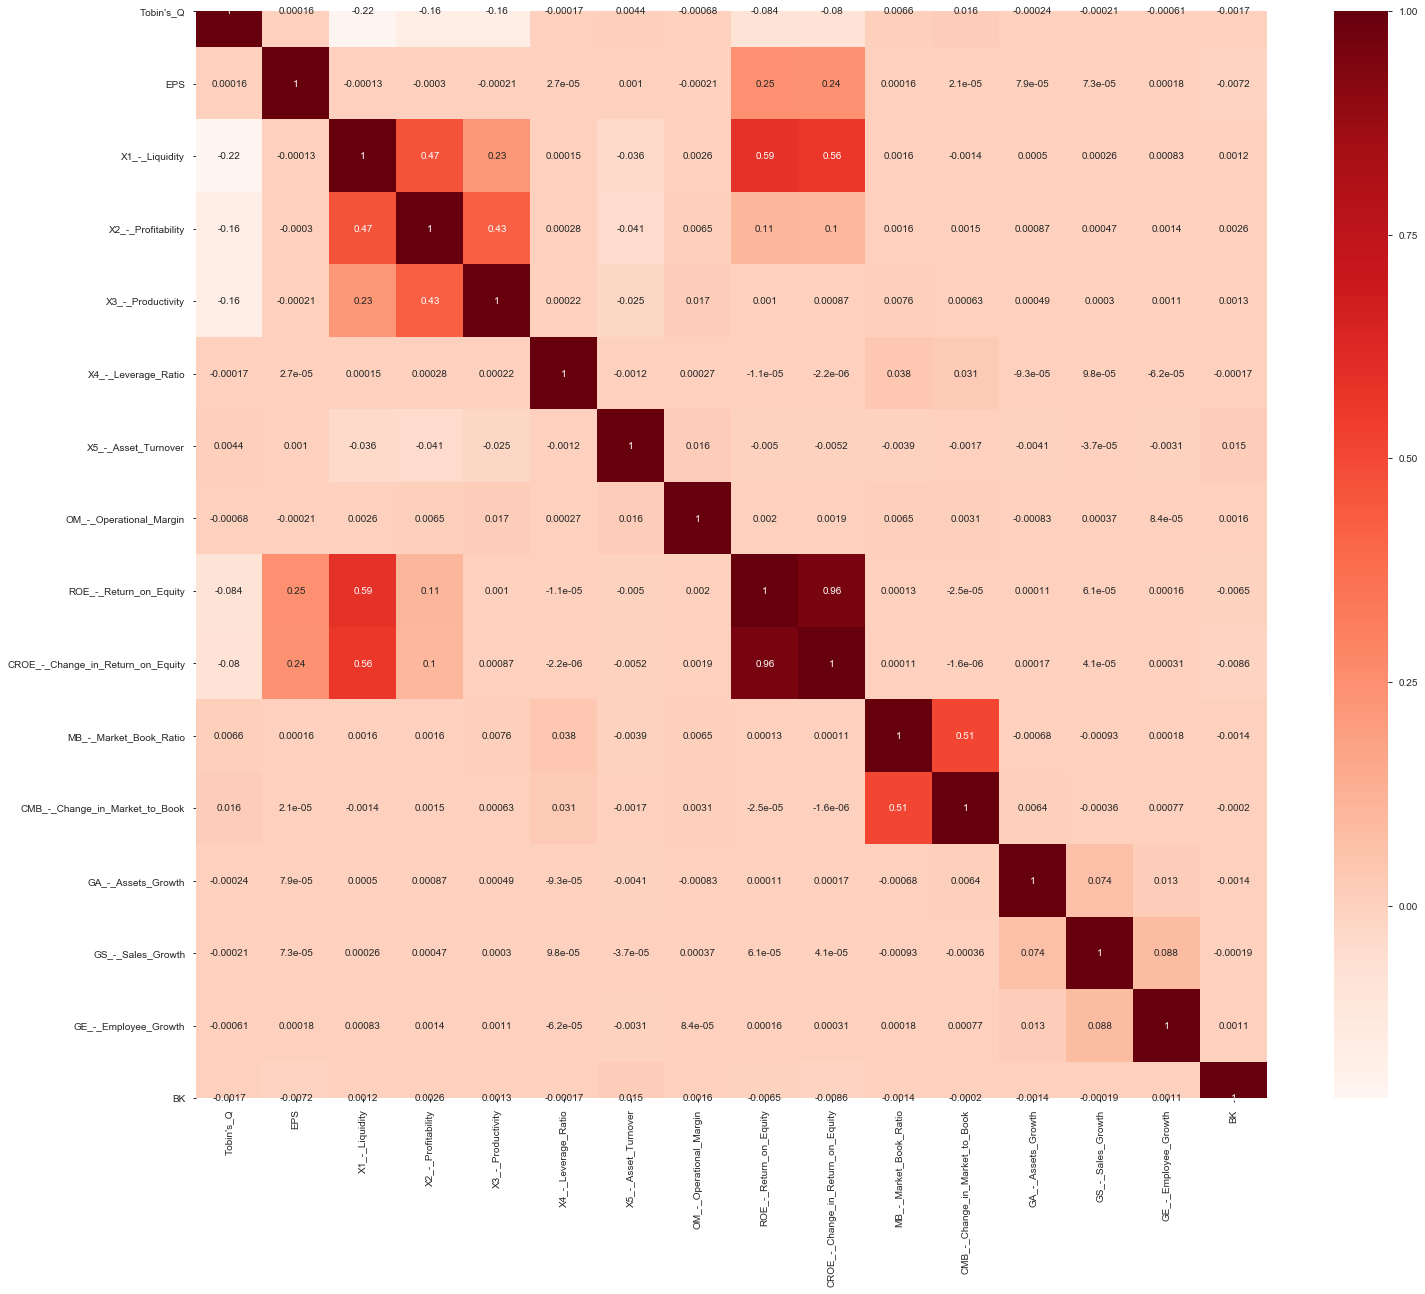

In [17]:
import seaborn as sns

mpl.rcParams['interactive'] == True
#Using Pearson Correlation
plt.figure(figsize=(24,20))
cor = df_A2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('Correlation_Pearson')
plt.show()

In [18]:
df_A2 = df_A2.drop(['MB_-_Market_Book_Ratio'], axis=1)

In [19]:
df_A2 = df_A2.drop(['ROE_-_Return_on_Equity'], axis=1)

In [20]:
X = df_A2.iloc[:,1:-1]
y = df_A2.iloc[:,-1]

### Run Feature Importance using Feature Correlation

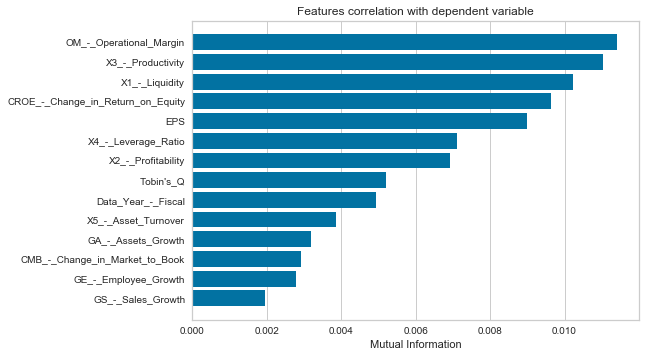

In [21]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(method='mutual_info-classification', sort=True)
visualizer.fit(X, y, random_state=0)
visualizer.poof()

### Min Max Scaler

In [22]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
#min_max_scaler.inverse_transform(X_minmax)  

### Feature importance Extra classifier

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_classifier = ExtraTreesClassifier()
extra_tree_classifier.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

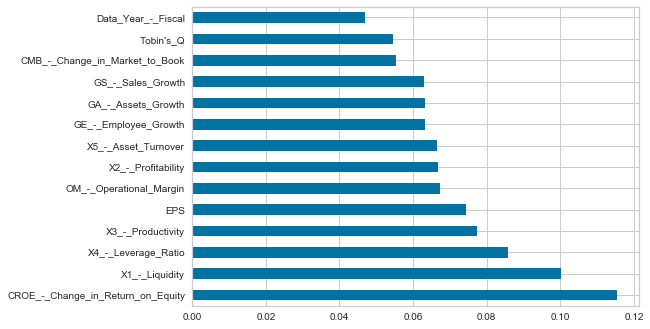

CROE_-_Change_in_Return_on_Equity    0.115505
X1_-_Liquidity                       0.100155
X4_-_Leverage_Ratio                  0.085813
X3_-_Productivity                    0.077254
EPS                                  0.074405
OM_-_Operational_Margin              0.067354
X2_-_Profitability                   0.066762
X5_-_Asset_Turnover                  0.066590
GE_-_Employee_Growth                 0.063322
GA_-_Assets_Growth                   0.063225
GS_-_Sales_Growth                    0.062847
CMB_-_Change_in_Market_to_Book       0.055443
Tobin's_Q                            0.054441
Data_Year_-_Fiscal                   0.046884
dtype: float64


In [24]:
#plot to see visually
n=15
feat_importances = pd.Series(extra_tree_classifier.feature_importances_,index=X.columns)
feat_importances.nlargest(n).plot(kind='barh') 
plt.savefig('extra_tree_classifier')
plt.show()
with pd.option_context('display.max_rows',None, 'display.max_columns',None):
    print(feat_importances.nlargest(n=15, keep = 'first'))

### train_test_split maintain proportion of the bk (bankrupt) vs non bk in the trainning and testset

In [25]:
from sklearn.model_selection import train_test_split,cross_validate
X_train, X_test, y_train, y_test = train_test_split(X_minmax,y,random_state=21,test_size=0.3,shuffle=True,stratify=y)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60319, 14)
(60319,)
(25852, 14)
(25852,)


### Upsampling using SMOTE

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_up, y_train_up = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_up.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_up.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_up == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_up == 0)))

Before OverSampling, counts of label '1': 391
Before OverSampling, counts of label '0': 59928 

After OverSampling, the shape of train_X: (119856, 14)
After OverSampling, the shape of train_y: (119856,) 

After OverSampling, counts of label '1': 59928
After OverSampling, counts of label '0': 59928


### Down Sampling using Near Miss

In [28]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_down, y_train_down = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_down.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_down.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_down == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_down == 0))) 

Before Undersampling, counts of label '1': 391
Before Undersampling, counts of label '0': 59928 

After Undersampling, the shape of train_X: (782, 14)
After Undersampling, the shape of train_y: (782,) 

After Undersampling, counts of label '1': 391
After Undersampling, counts of label '0': 391


In [29]:
y_train_up = pd.Series(y_train_up)

In [30]:
y_train_down = pd.Series(y_train_down)

In [31]:
y_train_up.value_counts()[1]/y_train_up.count()

0.5

In [32]:
y_train_down.value_counts()[1]/y_train_down.count()

0.5

In [33]:
y_test.value_counts()[1]/y_test.count()

0.006459848367631131

### Plot ROC/AUC Curve

In [34]:
def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=False):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    #ax.plot([0, 1], [0, 1], 'k--');
    ax.plot([0, 1], [0, 1]);
    ax.plot(fpr, tpr, label='{}, AUC={:.5f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr,marker='*');

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=9, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));
        
    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

# 1. RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## 1.1 RANDOM FOREST AFTER UPSAMPLING

#### Hyperparameter tuning for Upsampled Data

In [36]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [37]:
from sklearn.metrics import precision_recall_curve
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_up = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and use all available cores
rf_random_up = RandomizedSearchCV(estimator = rf_up, param_distributions = random_grid, scoring='f1',n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_random_up = RandomizedSearchCV(estimator = rf_up, param_distributions = random_grid, scoring='roc_auc',n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_up.fit(X_train_up, y_train_up)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 45.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Best parameters after hyperparameter tuning

In [38]:
rf_random_up.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

#### Train model using best parameters

In [39]:
RF_classifier_up = RandomForestClassifier(n_estimators=500,min_samples_split=10, min_samples_leaf = 1,
                                       max_features = 'auto', max_depth=50, bootstrap =  False, random_state=0)

In [40]:
RF_classifier_up.fit(X_train_up, y_train_up)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
y_pred_rf_up = RF_classifier_up.predict(X_test)

#### Random forest Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix

RF_cm = confusion_matrix(y_test,y_pred_rf_up)
print(RF_cm)

[[25458   227]
 [  116    51]]


#### Random forest Classification Report 

In [43]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred_rf_up))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99     25685
        True       0.18      0.31      0.23       167

    accuracy                           0.99     25852
   macro avg       0.59      0.65      0.61     25852
weighted avg       0.99      0.99      0.99     25852



#### Random Forest Performance Measures

In [44]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import log_loss 
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import roc_auc_score 



print("RF f1 score : %5.5f" %(round(f1_score(y_test,y_pred_rf_up),3)))
print("RF accuracy : %5.5f" %(round(accuracy_score(y_test,y_pred_rf_up),3)))
print("RF log loss : %5.5f" %(round(log_loss(y_test,y_pred_rf_up),3)))
print("RF Recall : %5.5f" %(round(recall_score(y_test,y_pred_rf_up),3)))
print("RF Precision : %5.5f" %(round(precision_score(y_test,y_pred_rf_up),3)))
auc = roc_auc_score(y_test, y_pred_rf_up)
print("RF AUC : %5.5f" %(auc))

RF f1 score : 0.22900
RF accuracy : 0.98700
RF log loss : 0.45800
RF Recall : 0.30500
RF Precision : 0.18300
RF AUC : 0.64828


#### Random Forest ROC AUC curve

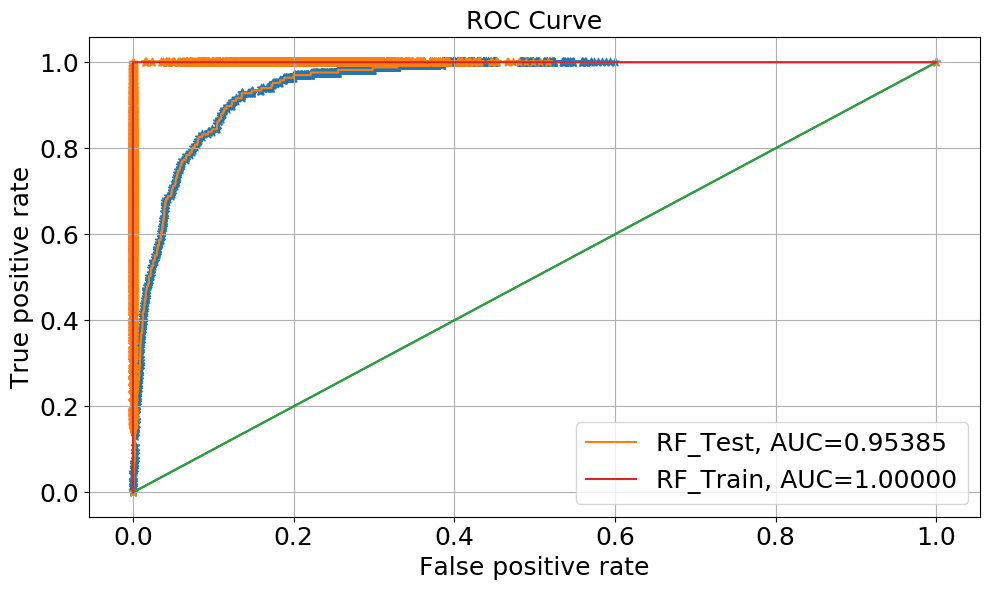

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax4 = plt.subplot(1, 1, 1);
plot_roc(RF_classifier_up, X_test, y_test, "RF_Test", ax4)
plot_roc(RF_classifier_up, X_train_up, y_train_up, "RF_Train", ax4)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

#### Plot Precision Recall Curve

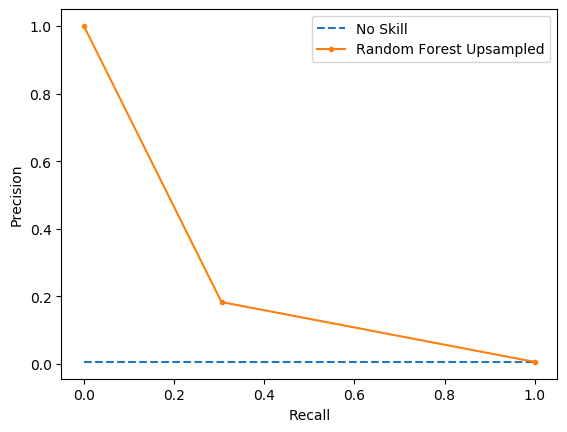

In [46]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

up_precision, up_recall, _ = precision_recall_curve(y_test, y_pred_rf_up)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(up_recall, up_precision, marker='.', label='Random Forest Upsampled')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 1.2 RANDOM FOREST AFTER DOWNSAMPLING

#### Hyper parameter tuning for Down Sampled dataset

In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_down = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and use all available cores
rf_random_down = RandomizedSearchCV(estimator = rf_down, param_distributions = random_grid, scoring='f1',n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_down.fit(X_train_down, y_train_down)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   53.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Best parameters after Hyperparameter Tuning

In [48]:
rf_random_down.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

#### Train model using best parameters

In [49]:
RF_classifier_down = RandomForestClassifier(n_estimators=400,min_samples_split=2, min_samples_leaf = 1,
                                       max_features = 'sqrt', max_depth=20, bootstrap =  False, random_state=0)

In [50]:
RF_classifier_down.fit(X_train_down, y_train_down)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
y_pred_rf_down = RF_classifier_down.predict(X_test)

#### Random Forest Confusion Matrix

In [52]:
RF_cm = confusion_matrix(y_test,y_pred_rf_down)
print(RF_cm)

[[ 4573 21112]
 [    7   160]]


#### Random Forest Classification Report

In [53]:
print(metrics.classification_report(y_test, y_pred_rf_down))

              precision    recall  f1-score   support

       False       1.00      0.18      0.30     25685
        True       0.01      0.96      0.01       167

    accuracy                           0.18     25852
   macro avg       0.50      0.57      0.16     25852
weighted avg       0.99      0.18      0.30     25852



#### Random Forest Performance Measures

In [54]:
print("RF f1 score : %5.5f" %(round(f1_score(y_test,y_pred_rf_down),3)))
print("RF accuracy : %5.5f" %(round(accuracy_score(y_test,y_pred_rf_down),3)))
print("RF log loss : %5.5f" %(round(log_loss(y_test,y_pred_rf_down),3)))
print("RF Recall : %5.5f" %(round(recall_score(y_test,y_pred_rf_down),3)))
print("RF Precision : %5.5f" %(round(precision_score(y_test,y_pred_rf_down),3)))
auc = roc_auc_score(y_test, y_pred_rf_down)
print("RF AUC : %5.5f" %(auc))

RF f1 score : 0.01500
RF accuracy : 0.18300
RF log loss : 28.21600
RF Recall : 0.95800
RF Precision : 0.00800
RF AUC : 0.56806


#### Random Forest ROC AUC Curve

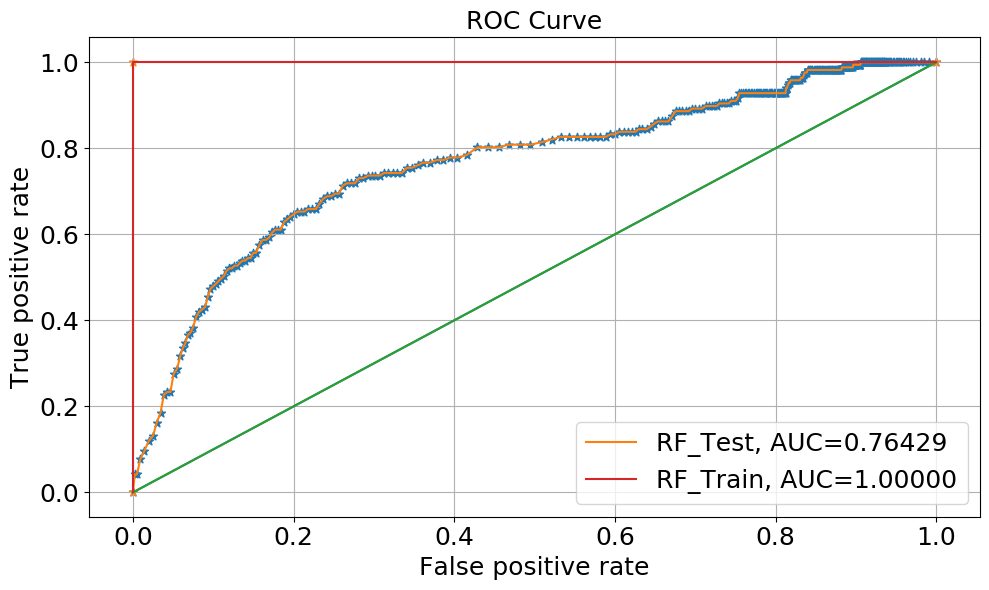

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax4 = plt.subplot(1, 1, 1);
plot_roc(RF_classifier_down, X_test, y_test, "RF_Test", ax4)
plot_roc(RF_classifier_down, X_train_down, y_train_down, "RF_Train", ax4)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

#### Plot Precision Recall Curve

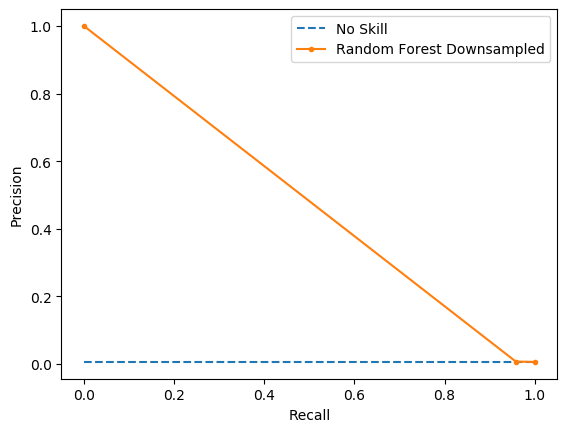

In [56]:
down_precision, down_recall, _ = precision_recall_curve(y_test, y_pred_rf_down)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(down_recall, down_precision, marker='.', label='Random Forest Downsampled')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 1.3 RANDOM FOREST REGULAR

#### Hyperparameter tuning of regular dataset

In [57]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='f1',n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 32.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Best Parameters after Hyperparameter tuning

In [58]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

#### Train Model using best Parameters

In [59]:
RF_classifier = RandomForestClassifier(n_estimators=400,min_samples_split=2, min_samples_leaf = 1,
                                       max_features = 'sqrt', max_depth=20, bootstrap =  False, random_state=0)

In [60]:
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [61]:
y_pred_rf = RF_classifier.predict(X_test)

#### Random Forest Confusion Matrix

In [62]:
RF_cm = confusion_matrix(y_test,y_pred_rf)
print(RF_cm)

[[25683     2]
 [  165     2]]


#### Random Forest Classification Report

In [63]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00     25685
        True       0.50      0.01      0.02       167

    accuracy                           0.99     25852
   macro avg       0.75      0.51      0.51     25852
weighted avg       0.99      0.99      0.99     25852



#### Random Forest Performance Measures

In [64]:
print("RF f1 score : %5.5f" %(round(f1_score(y_test,y_pred_rf),3)))
print("RF accuracy : %5.5f" %(round(accuracy_score(y_test,y_pred_rf),3)))
print("RF log loss : %5.5f" %(round(log_loss(y_test,y_pred_rf),3)))
print("RF Recall : %5.5f" %(round(recall_score(y_test,y_pred_rf),3)))
print("RF Precision : %5.5f" %(round(precision_score(y_test,y_pred_rf),3)))
auc = roc_auc_score(y_test, y_pred_rf)
print("RF AUC : %5.5f" %(auc))

RF f1 score : 0.02300
RF accuracy : 0.99400
RF log loss : 0.22300
RF Recall : 0.01200
RF Precision : 0.50000
RF AUC : 0.50595


#### Random Forest ROC AUC curve

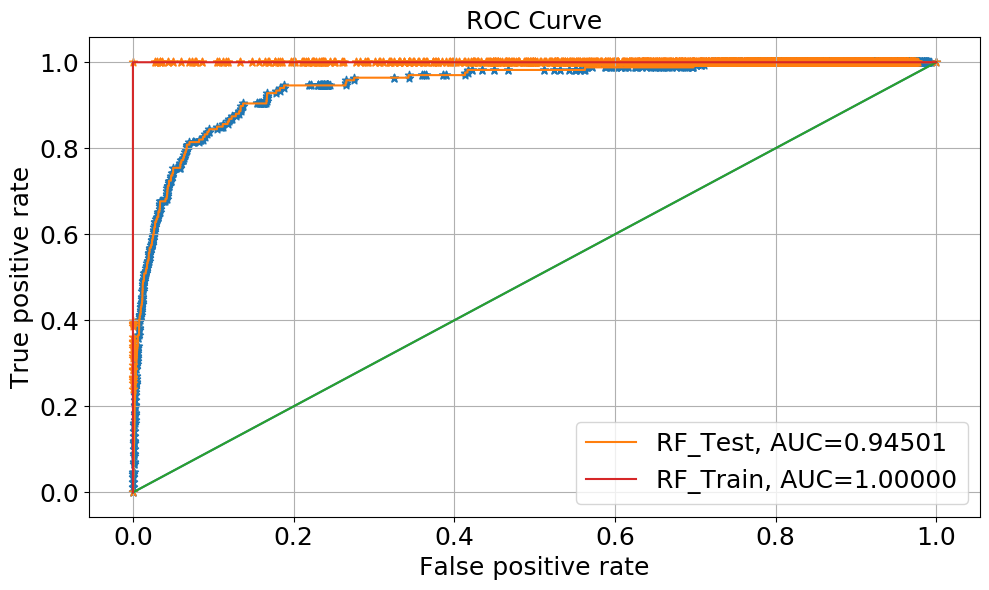

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax4 = plt.subplot(1, 1, 1);
plot_roc(RF_classifier, X_test, y_test, "RF_Test", ax4)
plot_roc(RF_classifier, X_train, y_train, "RF_Train", ax4)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

#### Plot Precision Recall Curve

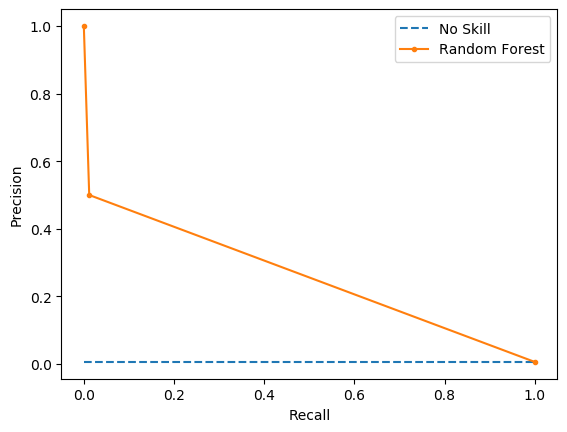

In [66]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_rf)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()